### Import libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Cargar dataset

Se carga el dataset y se seleccion columna con mayor correlación respecto al precio

In [30]:
df = pd.read_csv('house_data.csv')
df.corr(numeric_only=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


Se selecciona la columna *sqft_living* que hace referencia a los pies cuadrados. Luego se convierte a metros cuadrados.

In [31]:
#Select columns
df = df[['price', 'sqft_living']]
#Convert square foots to square meters
df['sq_meter'] = df['sqft_living']/10.764
#Reduce decimals
df['price'] = df['price'].round(2)
df['sq_meter'] = df['sq_meter'].round(2)
df = df.drop(columns='sqft_living') #drop column
df.head()

,price,sq_meter
0,313000.0,124.49
1,2384000.0,339.09
2,342000.0,179.30
3,420000.0,185.80
4,550000.0,180.23


Creación de heatmap para comprobar existencia de nulos.

<Axes: >

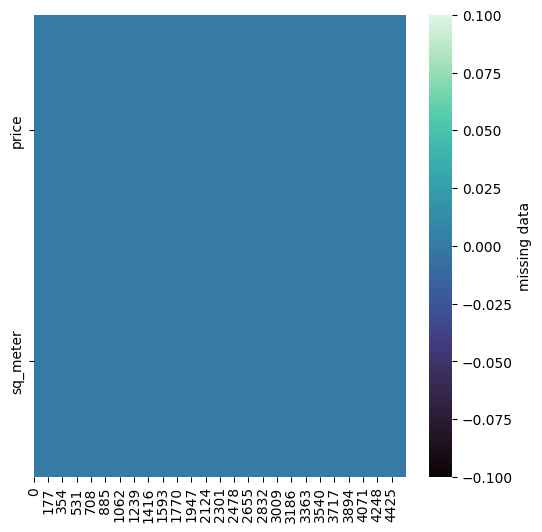

In [32]:
#Create heatmap with Seaborn to view nulls.
plt.figure(figsize=(6,6))
sns.heatmap(df.isna().transpose(),
           cmap = "mako",
           cbar_kws = {"label":"missing data"} )

Creación de histogramas y boxplot para verificar distribución de datos.

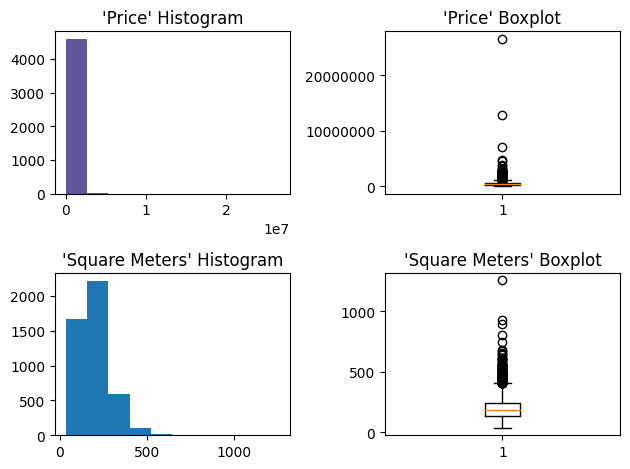

In [33]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['price'], color='#1C0D6E', alpha=0.7)
axs[0, 0].set_title("'Price' Histogram")

axs[0, 1].boxplot(df['price'])
axs[0, 1].set_title("'Price' Boxplot")
axs[0, 1].ticklabel_format(style='plain', axis='y')

axs[1, 0].hist(df['sq_meter'])
axs[1, 0].set_title("'Square Meters' Histogram")

axs[1, 1].boxplot(df['sq_meter'])
axs[1, 1].set_title("'Square Meters' Boxplot")

fig.tight_layout()
plt.show()


Al graficar la distribución se identifican outliers.

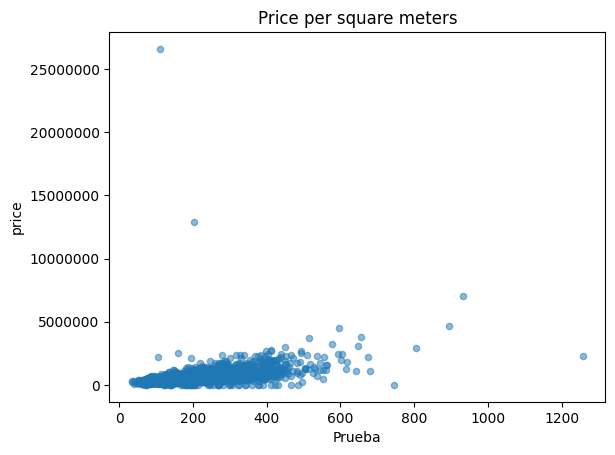

In [34]:
df.plot(x='sq_meter', y='price', kind='scatter', alpha=0.5)
plt.title('Price per square meters')
plt.xlabel('Prueba')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [35]:
#Delete 'Price' outliers
q25, q75 = np.percentile(df['price'], [25, 75])
iqr_price = stats.iqr(df['price']) #Rango interquartil
inf_price = q25 - (1.5*iqr_price) #Limite inferior price
up_price = q75 + (1.5*iqr_price) #Limite superior price
df = df[(df['price'] > 0) 
        & (df['price'] < up_price)]

In [36]:
#Delete 'sq_meter' outliers
q25, q75 = np.percentile(df['sq_meter'], [25, 75])
iqr_price = stats.iqr(df['sq_meter']) #Rango interquartil
inf_price = q25 - (1.5*iqr_price) #Limite inferior price
up_price = q75 + (1.5*iqr_price) #Limite superior price
df = df[(df['sq_meter'] > inf_price) 
        & (df['sq_meter'] < up_price)]

Se comprueba nuevamente la distribución de los datos y se encuentra una mejor normalización.

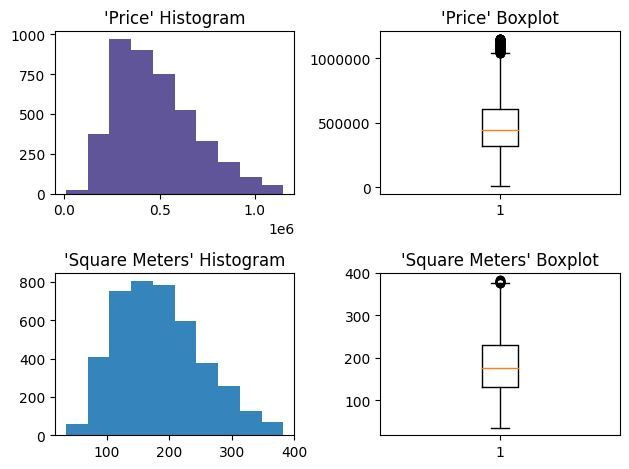

In [37]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['price'], color = '#1C0D6E', alpha=0.7)
axs[0, 0].set_title("'Price' Histogram")
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].boxplot(df['price'])
axs[0, 1].set_title("'Price' Boxplot")

axs[1, 0].hist(df['sq_meter'], alpha=0.9)
axs[1, 0].set_title("'Square Meters' Histogram")
axs[1, 1].boxplot(df['sq_meter'])
axs[1, 1].set_title("'Square Meters' Boxplot")

fig.tight_layout()
plt.show()

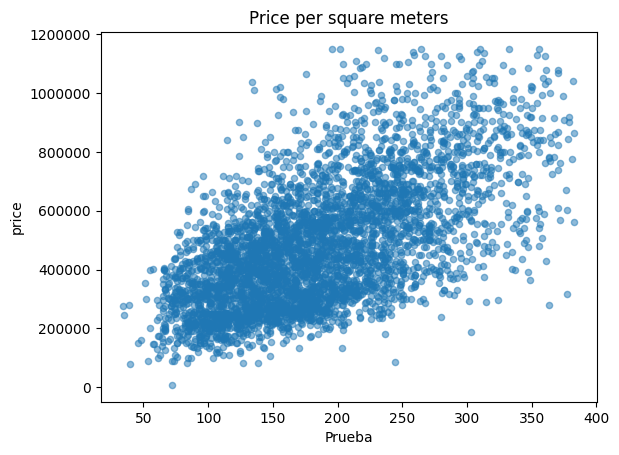

In [38]:
df.plot(x='sq_meter', y='price', kind='scatter', alpha=0.5)
plt.title('Price per square meters')
plt.xlabel('Prueba')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Entrenamiento

Se asigna el 70% del dataset a training y el restante a test.

In [39]:
training = df.sample(frac=0.7, random_state=25)
test = df.drop(training.index)

print(f'Number of training dataset: {training.shape[0]}')
print(f'Number of training dataset: {test.shape[0]}')

Number of training dataset: 2965
Number of training dataset: 1271


Save datasets

In [40]:
training.to_csv('training.csv', index=False)
test.to_csv('test.csv', index=False)

In [45]:

x_train = np.array(training['sq_meter']).reshape(-1, 1)
y_train = np.array(training['price']).reshape(-1, 1)
reg = LinearRegression()
reg.fit(x_train, y_train)



LinearRegression()

In [46]:
test['price_predicted'] = reg.predict(np.array(test['sq_meter']).reshape(-1,1))

test.head()

,price,sq_meter,price_predicted
0,313000.0,124.49,367703.473600
7,482000.0,251.77,611705.664447
12,588500.0,216.46,544014.610403
13,365000.0,101.26,323170.389899
17,367500.0,288.93,682943.261964


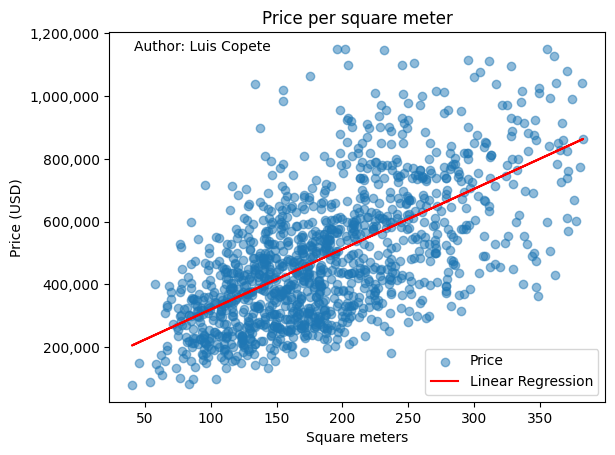

In [47]:

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar los puntos de dispersión
ax.scatter(test['sq_meter'], test['price'], alpha=0.5, label='Price')

# Graficar la regresión lineal
ax.plot(test['sq_meter'], test['price_predicted'], color='red', label='Linear Regression')

# Configurar el formato de los ejes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Configurar el título y las etiquetas de los ejes
plt.title('Price per square meter')
plt.xlabel('Square meters')
plt.ylabel('Price (USD)')

# Mostrar la leyenda
plt.legend()

plt.text(0.05, 0.95, 'Author: Luis Copete', transform=ax.transAxes, fontsize=10)

# Mostrar la gráfica
plt.show()


### Model performance

In [48]:
x = df[['sq_meter']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred = regression.predict(x_test)

In [51]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2): ", r2)


Mean Squared Error (MSE):  27334450124.77295
R-squared (R2):  0.34725475877763756
